In [7]:
#Necessary Libraries
import pandas as pd #For load dataset
import matplotlib.pyplot as plt #For visualization
import seaborn as sns #Updated version of matplotlib.pyplot
from datetime import datetime,timedelta #For work on dates and times

# Load your dataset into a pandas DataFrame
df = pd.read_excel('C:\\Users\\user\\Datasets\\store_1.xlsx')
df

,Customer ID,Customer Name,Order Date,Segment,City,State,Country,Product ID,Category,Sub-Category,Product Name,Unit Price,Total Purchase,Quantity,Discount,Profit
0,AB-100151402,Aaron Bergman,2017-02-01,Consumer,Oklahoma City,Oklahoma,United States,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,110.990,221.980,2,0.0,62.1544
1,AB-100151402,Aaron Bergman,2017-02-09,Consumer,Oklahoma City,Oklahoma,United States,FUR-BO-5957,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",170.980,341.960,2,0.0,54.7136
2,AB-100151404,Aaron Bergman,2017-02-10,Consumer,Seattle,Washington,United States,FUR-CH-4421,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.712,48.712,1,0.2,5.4801
3,AB-100151404,Aaron Bergman,2017-02-11,Consumer,Seattle,Washington,United States,OFF-AR-5309,Office Supplies,Art,Newell 330,5.980,17.940,3,0.0,4.6644
4,AB-100151402,Aaron Bergman,2017-02-17,Consumer,Arlington,Texas,United States,OFF-ST-3078,Office Supplies,Storage,Akro Stacking Bins,6.312,12.624,2,0.2,-2.5248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,ZC-2191048,Zuschuss Carroll,2019-11-29,Consumer,Berlin,Berlin,Germany,OFF-AP-3572,Office Supplies,Appliances,"Breville Microwave, Silver",241.968,1209.840,5,0.2,241.8900
2564,ZC-2191064,Zuschuss Carroll,2020-02-21,Consumer,Rome,Lazio,Italy,TEC-PH-5839,Technology,Phones,"Samsung Smart Phone, Cordless",383.400,2683.800,7,0.4,-1476.0900
2565,ZC-219107,Zuschuss Carroll,2020-09-17,Consumer,Palmerston,Northern Territory,Australia,TEC-MA-5008,Technology,Machines,"Konica Inkjet, Wireless",282.204,1411.020,5,0.1,580.0200
2566,ZC-2191064,Zuschuss Carroll,2023-01-21,Consumer,Rome,Lazio,Italy,TEC-CO-3688,Technology,Copiers,"Canon Fax Machine, High-Speed",316.590,949.770,3,0.0,113.9400


In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date']) # Convert Order Date into datetime format

In [9]:
# Filter orders from before sep_15_2023 
pre_sep_15_2023 = df[df['Order Date'] < '2023-09-15']

# Filter orders from before march 2023 
pre_mar_2023 = df[df['Order Date'] < '2023-03-01']

# Filter orders from after sep_15_2023 
post_sep_15_2023 = df[df['Order Date'] >= '2023-09-15']

# Filter orders from past 12 months
past_year = df[df['Order Date'] > '2023-02-20']


In [10]:
# Calculate KPIs
#AOV(Average Order Value) => it is the ratio of total revenue and total number of orders
aov_pre_sep_15_2023 =pre_sep_15_2023['Total Purchase'].sum()/len(pre_sep_15_2023)
aov_pre_mar_2023 = pre_mar_2023['Total Purchase'].sum()/len(pre_mar_2023)
aov_post_sep_15_2023 = post_sep_15_2023['Total Purchase'].sum()/len(post_sep_15_2023)

#ACLV(Average Customer Lifetime Value) => it is the average of total revenue get from each customer
unique_cust_pre = len(pre_sep_15_2023['Customer ID'].unique())
pre_sept15_aclv = pre_sep_15_2023['Total Purchase'].sum() / unique_cust_pre


# ACLV Total 
unique_cust_total = len(df['Customer ID'].unique())
total_aclv = df['Total Purchase'].sum() / unique_cust_total

# Active customers since 90 days
cutoff_date=datetime.today()-timedelta(days=90) #Subtarct 90 days from current day
data_90d=df[df['Order Date'] > cutoff_date] #store past 90 days orders  


active_customers = len(data_90d['Customer ID'].unique())

# Calculate monthly orders  
monthly_orders = past_year.resample('M', on='Order Date').size() #groupby the data by month based on order date

# Get mean for average monthly orders
avg_monthly_orders = monthly_orders.mean()


In [14]:
#Convert values in dataframe
kpi_data = pd.DataFrame({
    'KPI': ['AOV Pre Sep 15 2023', 'AOV Pre Mar 2023', 'AOV Post Sep 15 2023',
            'ACLV Pre Sep 15 2023', 'ACLV Total', 'Active Customers Since 90 Days', 'Orders/Month Avg'],
    'Value': [aov_pre_sep_15_2023, aov_pre_mar_2023, aov_post_sep_15_2023,
              pre_sept15_aclv, total_aclv, active_customers, avg_monthly_orders]
})

In [15]:
kpi_data

,KPI,Value
0,AOV Pre Sep 15 2023,1319.145846
1,AOV Pre Mar 2023,1358.376994
2,AOV Post Sep 15 2023,877.497173
3,ACLV Pre Sep 15 2023,1712.339156
4,ACLV Total,1682.308806
5,Active Customers Since 90 Days,77.000000
6,Orders/Month Avg,27.461538


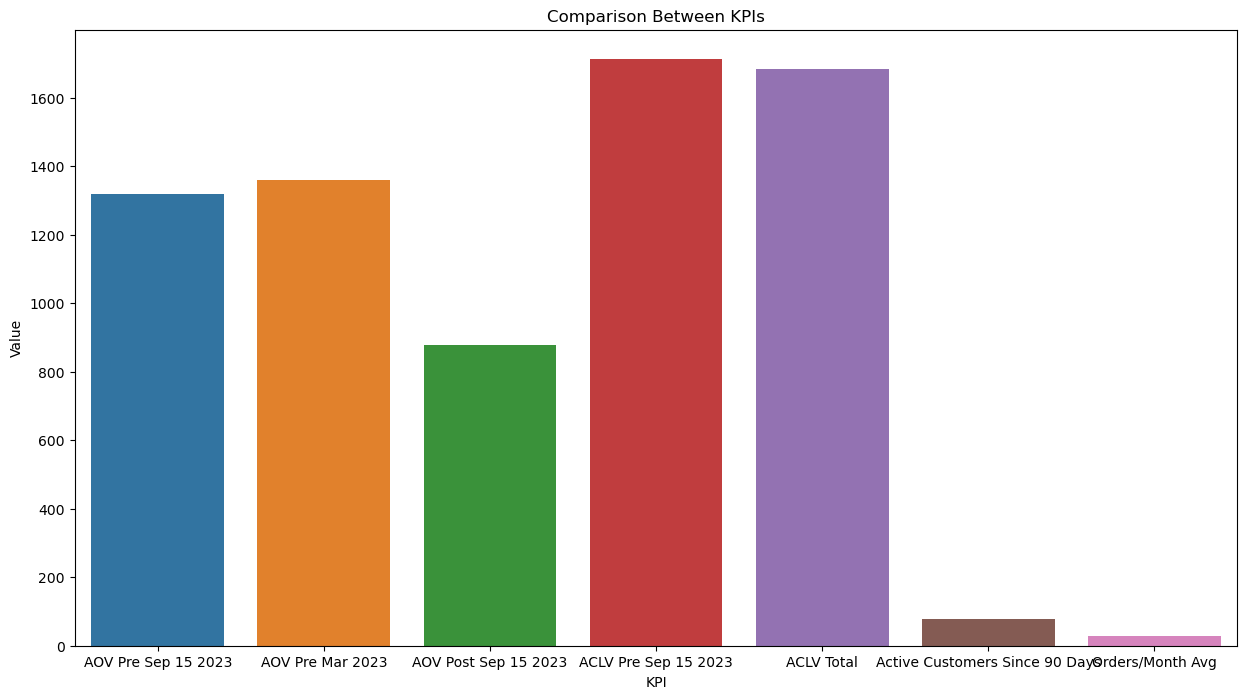

In [21]:
plt.figure(figsize=(15,8))
sns.barplot(x=kpi_data['KPI'],y=kpi_data['Value'])
plt.title("Comparison Between KPIs")
plt.show()